In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import mglearn

## Naive Bayes

- 조건부 확률
- 나이브베이즈.pdf
+ 선형 모델과 유사 (LogisticRegression, Linear SVC, ...)
+ 훈련속도는 빠르지만, 일반화 성능이 조금 뒤쳐진다.
+ 종류
    - GaussianNB : 연속 데이터
    - BernoulliNB : 이산 데이터
    - MultinomialNB : 이산 데이터
    
+ 파라미터
    - alpha

### Gaussian Naive Bayes (정규분포 나이브 베이즈)

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
model = GaussianNB().fit(X_train, y_train)

In [7]:
pred = model.predict(X_test)

In [8]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.85      0.92        13
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.94      0.93      0.93        30



In [9]:
accuracy_score(y_test, pred)

0.9333333333333333

In [12]:
confusion_matrix(y_test, pred)

array([[ 7,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 10]], dtype=int64)

### Multinomial Naive Bayes (다항분포 나이브 베이즈)

+ 영화 리뷰를 이용한 평가 예측 (부정/긍정)

In [14]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [15]:
# type 특성을 숫자로 매핑
df["label"] = df["type"].map({"positive":1, "negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [18]:
df_x = df["movie_review"]
df_y = df["label"]

#### Scikit-Learn 문서 전처리 기능
- Scikit-Learn의 feature_extraction 서브패키지와 feature_extraction.text 서브패키지는 다음과 같은 문서 전처리용 클래스를 제공한다.
    
    + DictVectorizer : 각 단어의 수를 세어놓은 사전에서 BOW 인코딩 벡터를 만든다.
    + CountVectorizer: 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만든다.
    + TfidfVectorizer: CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.
    + HashingVectorizer: 해시 함수(hash function)을 사용하여 적은 메모리와 빠른 속도로 BOW 인코딩 벡터를 만든다.
    
- 출처 : https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
## CountVectorizer는 다음과 같은 세가지 작업을 수행한다.
# 1. 문서를 토큰 리스트로 변환한다.
# 2. 각 문서에서 토큰의 출현 빈도를 센다.
# 3. 각 문서를 BOW 인코딩 벡터로 변환한다.

In [59]:
cv = CountVectorizer()
x_traincv = cv.fit_transform(df_x)
x_traincv

encoded_input = x_traincv.toarray() # 리뷰에서 사용된 37개의 단어(열) - 2번 있으면 2, 1번 있으면 1, 없으면 0

In [60]:
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [24]:
# 37개의 단어 확인
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
mnb = MultinomialNB().fit(x_traincv, df_y)

In [31]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})
test_x = test_df["movie_review"]
test_y = test_df["label"]

In [33]:
x_testcv = cv.transform(test_x)
pred = mnb.predict(x_testcv)

In [34]:
accuracy_score(test_y, pred)

1.0

### Bernoulli Naive Bayes(베르누이분포 나이브 베이즈)

- 스팸메일

In [35]:
from sklearn.naive_bayes import BernoulliNB

In [50]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

In [51]:
train_df = pd.DataFrame(email_list)
#train_df
train_df["label"] = train_df["spam"].map({True:1, False:0})
#train_df
train_df_x = train_df["email title"]
train_df_y = train_df["label"]

In [52]:
cv = CountVectorizer()
train_df_x_cv = cv.fit_transform(train_df_x)
train_df_x_cv

encoded_input = train_df_x_cv.toarray()

In [53]:
cv.inverse_transform(encoded_input[0])

[array(['free', 'game', 'only', 'today'], dtype='<U9')]

In [54]:
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [55]:
bnb = BernoulliNB().fit(train_df_x_cv, train_df_y)

In [56]:
test_df = pd.DataFrame(test_email_list)
test_df["label"] = test_df["spam"].map({True:1, False:0})
test_df_x = test_df["email title"]
test_df_y = test_df["label"]

In [57]:
x_testcv = cv.transform(test_df_x)
pred = bnb.predict(x_testcv)

In [58]:
accuracy_score(test_df_y, pred)

0.8333333333333334

-------------------

# 비지도학습~
## K-means

- kmeans.pdf

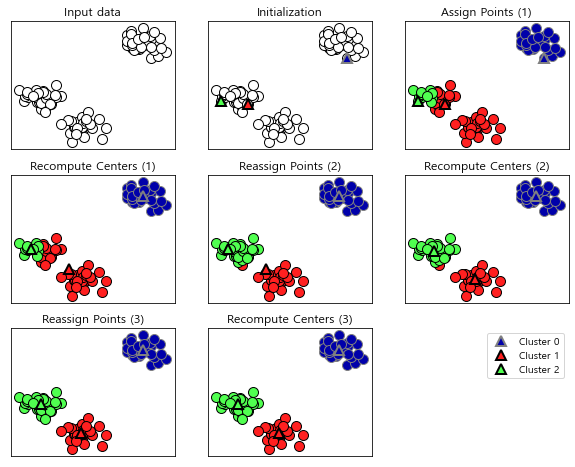

In [2]:
mglearn.plots.plot_kmeans_algorithm()

### make_blobs() 샘플 활용

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [6]:
X, y = make_blobs()

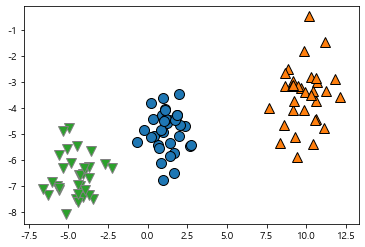

In [7]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [8]:
km = KMeans(n_clusters=3).fit(X, y)

In [10]:
# 스스로 분류한 레이블 확인
lbl = km.labels_

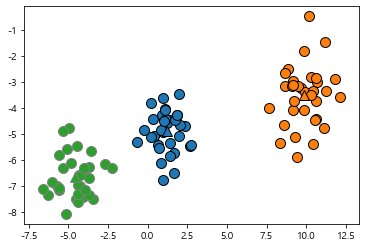

In [15]:
mglearn.discrete_scatter(X[:,0], X[:,1], lbl, markers="o")

# center 위치 확인 
mglearn.discrete_scatter(km.cluster_centers_[:, 0],
                        km.cluster_centers_[:, 1], [0, 1, 2], markers="^")

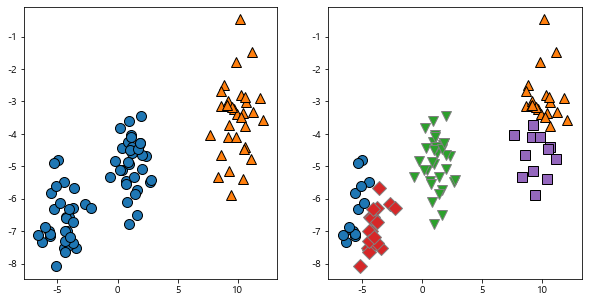

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

idx = 0
for k in [2, 5]:
    km = KMeans(n_clusters=k).fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, ax=axes[idx])
    idx += 1

### make_moons 샘플 활용

In [18]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

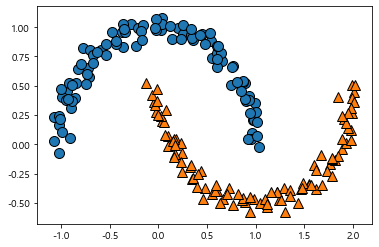

In [21]:
mglearn.discrete_scatter(X[:,0], X[:,1], y) # 정답

In [19]:
km = KMeans(n_clusters=2).fit(X)

In [20]:
# lbl = km.labels_
pred = km.predict(X)

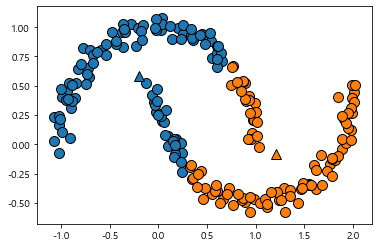

In [24]:
mglearn.discrete_scatter(X[:,0], X[:,1], pred, markers="o")

# 분류 예측 실패

mglearn.discrete_scatter(km.cluster_centers_[:, 0],
                        km.cluster_centers_[:, 1], [0, 1], markers="^")

# K-means는 정확히 분류되지 않는 데이터의 경우 성능이 떨어진다.

In [26]:
accuracy_score(pred, y) # 75프로

0.755

### iris 샘플 활용

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()

X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=["target"])

X.head()
y.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 1.0, '꽃잎')

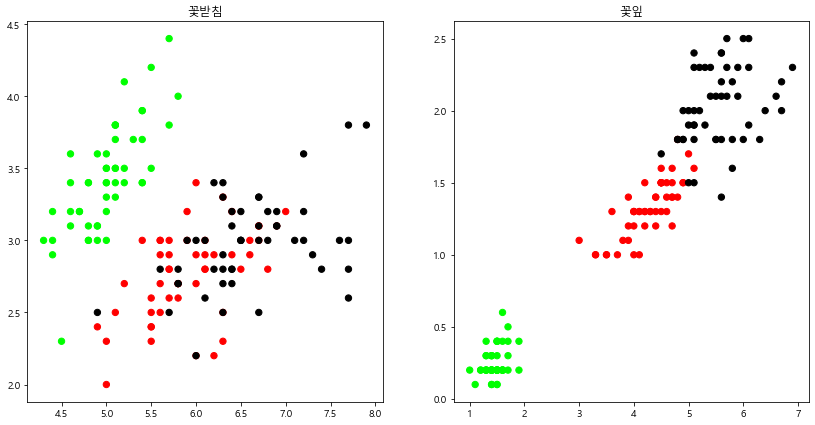

In [49]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽃잎")

In [50]:
km = KMeans(n_clusters=3).fit(X)

In [51]:
km.labels_
# 0: setosa, 1: versicolor, 2: virginica
# K-means는 라벨 순서 모르기 때문에 훈련 시마다 라벨 순서 바뀔 수 있다

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '꽃잎(예측)')

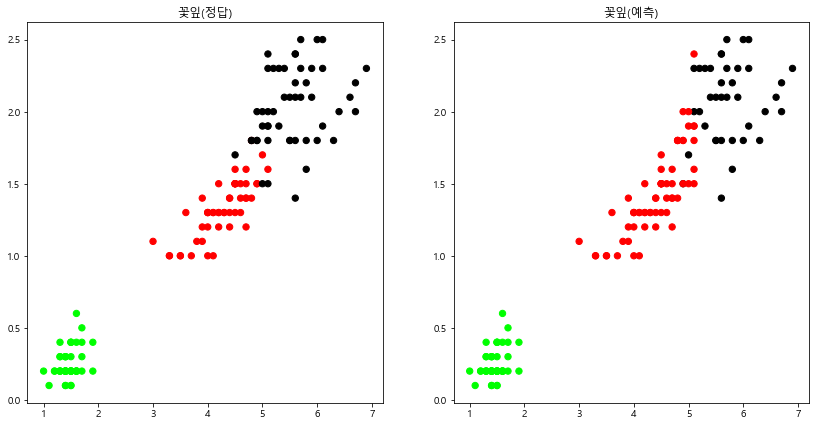

In [52]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽃잎(정답)")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[km.labels_], s=40)
plt.title("꽃잎(예측)")

In [53]:
accuracy_score(y, km.labels_)

0.8933333333333333

In [54]:
confusion_matrix(y, km.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

#### 사람의 키와 몸무게 데이터 활용

In [59]:
df = pd.DataFrame(columns = ["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 65]
df.loc[2] = [185, 75]
df.loc[3] = [165, 50]
df.loc[4] = [170, 58]
df.loc[5] = [155, 60]
df.loc[6] = [157, 57]
df.loc[7] = [162, 62]
df.loc[8] = [173, 70]
df.loc[9] = [171, 70]
df

,height,weight
0,185,60
1,180,65
2,185,75
3,165,50
4,170,58
5,155,60
6,157,57
7,162,62
8,173,70
9,171,70


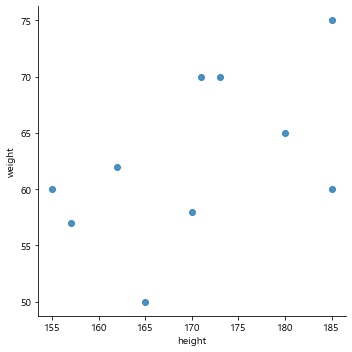

In [58]:
sns.lmplot("height", "weight", data=df, fit_reg=False) # 회귀선 빼고 그려야 에러 안나요

In [66]:
km = KMeans(n_clusters=3).fit(df.values)

In [69]:
df["label"] = km.labels_
df

,height,weight,label
0,185,60,1
1,180,65,1
2,185,75,1
3,165,50,0
4,170,58,0
5,155,60,0
6,157,57,0
7,162,62,0
8,173,70,2
9,171,70,2


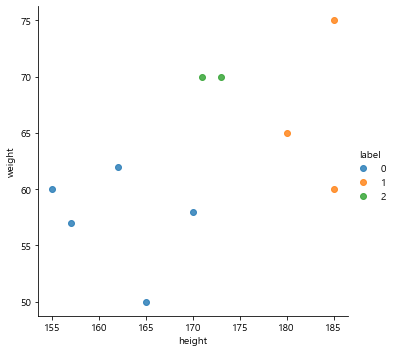

In [70]:
sns.lmplot("height", "weight", data=df, fit_reg=False, hue="label")

----
## 타이타닉을 이용한 알고리즘 성능 비교

### 1. Prepare Data

+ https://www.kaggle.com/c/titanic

In [16]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2. EDA (탐색적 데이터 분석)

In [75]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [77]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [78]:
'''
- Pclass : Ticket class
- Sex
- SibSp : # of siblings / spouses
- Parch : # of parents / children
- Embarked : Port of Embarkation
    C: Cherbourg
    Q: Queenstown
    S: Southampton
- Cabin : Cabin number
'''

'\n- Pclass\n- Sex\n- SibSp\n- Parch\n- Embarked\n    C: Cherbourg\n    Q: Queenstown\n    S: Southampton\n- Cabin\n'

In [17]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ["survived", "dead"]
    df.plot(kind="bar", stacked=True, figsize=(10, 5))

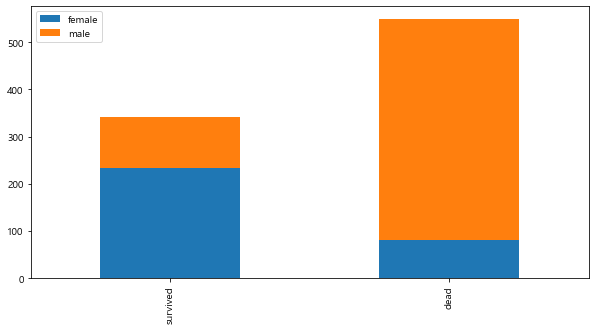

In [18]:
# 성별로 survived, dead 확인
bar_chart("Sex")

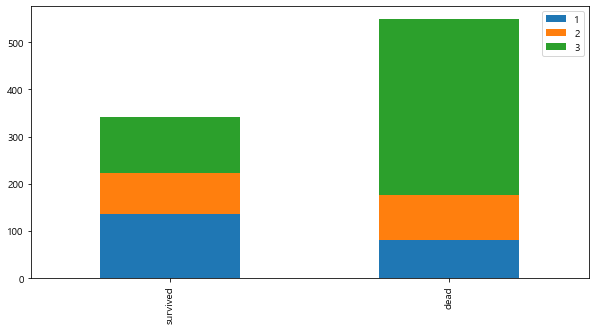

In [86]:
# 객실 클래스별로 survived, dead 확인
bar_chart("Pclass")
# 3등급 사람들이 많이 죽음

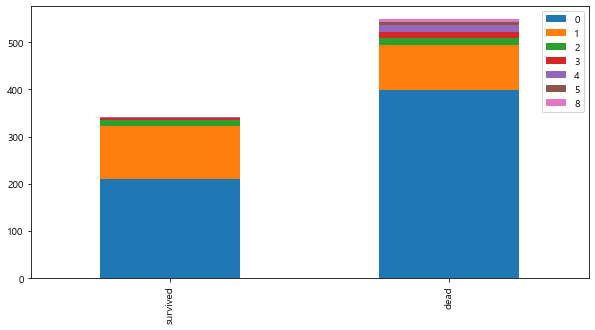

In [87]:
# 형제/배우자 유무로 survived, dead 확인
bar_chart("SibSp")
# 혼자 탄 사람들이 많이 죽음

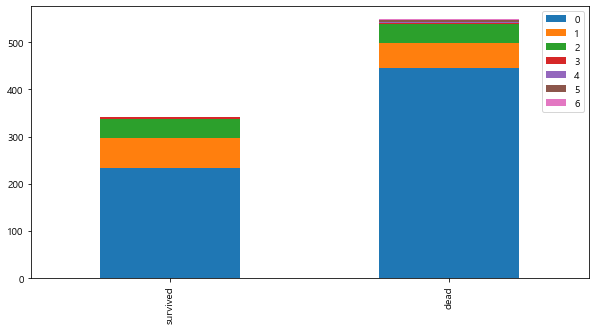

In [88]:
#  부모/아이 유무로 survived, dead 확인
bar_chart("Parch")
# 혼자 탄 사람들이 많이 죽음

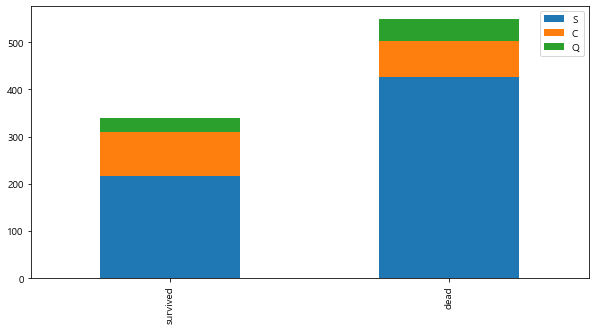

In [89]:
bar_chart("Embarked")

### 3. Feature Engineering (데이터 전처리)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


#### 1) Name 컬럼을 이용하여 호칭(Mr, Mrs, Miss)을 추출

In [19]:
train_test_data = [train, test]

# Name 컬럼을 문자열로 변환 후 정규표현식을 사용하여 Mr., Mrs., Miss. 등을 추출
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\. ") # 정규표현식 : 공백Mr.공백

In [5]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
Sir           1
Mme           1
Jonkheer      1
Ms            1
Countess      1
Don           1
Lady          1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [20]:
# Title 컬럼 추가 - Mr:0, Miss:1, Mrs:2, 나머지 호칭:3
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Major":3, "Mlle":3, "Jonkheer":3, "Lady":3, "Capt":3, "Don":3, "Mme":3, "Ms":3, "Sir":3, "Countess":3, "Dona":3}

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping) # 정규표현식 : 공백Mr.공백

In [21]:
train.head()
train["Title"].value_counts()
test["Title"].value_counts()

0    240
1     78
2     72
3     28
Name: Title, dtype: int64

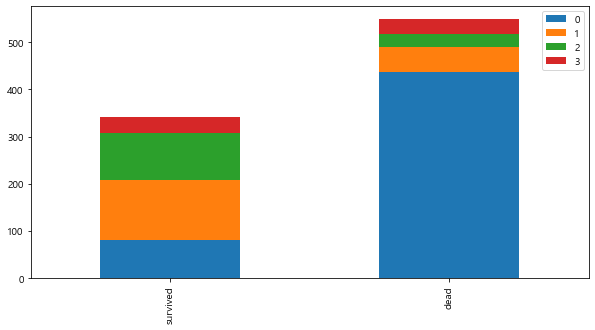

In [9]:
bar_chart("Title")

In [22]:
# Name 컬럼 삭제
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [86]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


#### 2) Sex 데이터의 인코딩

In [23]:
# Sex 컬럼 수정 - male:0, female:1
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})

In [13]:
train.head()
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,NaN,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,NaN,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,NaN,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,NaN,35.0,0,0,373450,8.0500,NaN,S,0


#### 3) Age 데이터의 Binning

+ 연령별로 카테고리화하기
    - child:0, young:1, adult:2, mid_age:3, senior:4
    - child:16세 이하, young: 16 ~ 26, adult: 26 ~ 36, mid_age: 36 ~ 62, senior: 62세 이상

In [24]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [25]:
# 결측치 처리 : 평균 나이로 대체
# 남성들은 Mr의 평균 나이, Mrs은 Mrs의 평균 나이, Miss는 Miss의 평균 나이

# Mr, Mrs, Miss의 나이 median을 구해서 (train.groupby("Title")["Age"].transform("median")), 
# train 데이터의 나이 변수 결측치 값을 채운다. (train["Age"].fillna()
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

# test도 마찬가지로 처리
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [27]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[dataset["Age"]>=62, "Age"] = 4

In [28]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


#### 4) Embarked 데이터의 결측치 처리, 인코딩

In [21]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [29]:
train["Embarked"].value_counts()
# S(Southhampton)이 가장 많으므로, 결측치는 S로 하자

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
train["Embarked"].fillna("S", inplace=True)

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [32]:
# Embarked 컬럼 수정 - "S":0, "C":1, "Q":2
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1, "Q":2})

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


#### 5) Fare 데이터의 결측치 처리, Binning

+ 17이하면 0, 18 ~ 30는 1, 31 ~ 100는 2, 그 이상은 3으로 설정

In [34]:
train.isnull().sum() # Train 데이터에는 Fare 결측치 없음
test.isnull().sum()  # Test 데이터에는 Fare 결측치 있음

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [35]:
# test Fare 데이터의 결측치 처리
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
# test["Fare"] = test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median")) 위와 동일

In [36]:
test["Fare"].isnull().sum() # Test 데이터 Fare 결측치 처리완료

0

In [37]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"]<=17, "Fare"] = 0
    dataset.loc[(dataset["Fare"]>17) & (dataset["Fare"]<=30), "Fare"] = 1
    dataset.loc[(dataset["Fare"]>30) & (dataset["Fare"]<=100), "Fare"] = 2
    dataset.loc[dataset["Fare"]>100, "Fare"] = 3

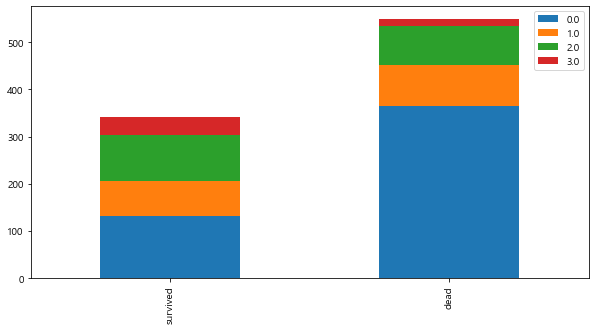

In [31]:
bar_chart("Fare")
# 요금이 싼 객실에서 더 많이 사망함

#### 6) cabin 데이터 처리

In [25]:
# 객실등급, 번호 확인
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
D              3
              ..
C47            1
E49            1
A36            1
D50            1
C90            1
Name: Cabin, Length: 147, dtype: int64

In [38]:
# 객실등급만 추출하기 - 알파벳 첫번째 문자
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


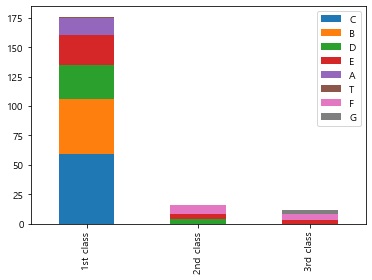

In [39]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st class", "2nd class", "3rd class"]
df.plot(kind="bar", stacked=True)

In [40]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [41]:
train["Cabin"].value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [42]:
# Cabin의 결측치가 많다.
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [43]:
# Cabin의 결측치 -> Pclass의 값을 가져다 채우자
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [44]:
# Cabin의 결측치 처리 완료
train["Cabin"].isnull().sum()
test["Cabin"].isnull().sum()

0

#### 7) SibSp, Parch 컬럼 -> 총가족수(FamilySize) 컬럼으로 합치기

In [45]:
# +1 : 본인
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [46]:
train["FamilySize"].value_counts()
test["FamilySize"].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

#### 8) 필요없는 컬럼 삭제 및 모델링을 위한 데이터 준비

In [47]:
feature_drop = ["Ticket", "SibSp", "Parch"]
train = train.drop(feature_drop, axis=1)
test = test.drop(feature_drop, axis=1)

In [48]:
train.head()
#test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,2
1,2,1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,3,1,2.0,0.0,2.0,0,1,1
3,4,1,1,1,2.0,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0.0,2.0,0,0,1


In [49]:
# train 데이터에 PassengerId 삭제하고, 독립변수들만 남기기
train = train.drop(["PassengerId"], axis=1)

In [50]:
# train 데이터에 Survived 삭제하고, 정답으로 저장
X = train.drop(["Survived"], axis=1)
y = train["Survived"]

In [111]:
print(X.shape, y.shape)

(891, 8) (891,)


In [51]:
################## CHECK POINT : 중간 결과 저장 ##########################
X.to_csv("data/titanic/train_data.csv", index=False)
y.to_csv("data/titanic/target.csv", index=False)
test.to_csv("data/titanic/test_result.csv", index=False)

### 4. Modeling

+ KNN
+ Decision Tree
+ Random Forest
+ SVM
+ Naive Bayes

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB # 연속데이터이므로 가우시안 나이브 베이즈 선택

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [53]:
X = pd.read_csv("data/titanic/train_data.csv")
y = pd.read_csv("data/titanic/target.csv")

In [54]:
X.head()
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [55]:
# 10등분 하여 검증하기
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [56]:
# KNN
knnclf = KNeighborsClassifier(n_neighbors=26)
score = cross_val_score(knnclf, X, np.ravel(y), cv=kfold, scoring="accuracy")
# np.ravel() : 다차원 배열을 1차원 배열로 펴주는 함수

print(score)
round(np.mean(score)*100, 2) # score 평균 :  82.15프로

[0.82222222 0.82022472 0.83146067 0.82022472 0.83146067 0.82022472
 0.82022472 0.79775281 0.83146067 0.82022472]


82.15

In [58]:
# Decision Tree
dtclf = DecisionTreeClassifier()
score = cross_val_score(dtclf, X, np.ravel(y), cv=kfold, scoring="accuracy")
# np.ravel() : 다차원 배열을 1차원 배열로 펴주는 함수

print(score)
round(np.mean(score)*100, 2) # score 평균 :  80.14프로

[0.78888889 0.88764045 0.75280899 0.78651685 0.87640449 0.7752809
 0.79775281 0.79775281 0.74157303 0.80898876]


80.14

In [59]:
# Random Forest
rfclf = RandomForestClassifier(n_estimators=300) # 트리 개수 : 300개
score = cross_val_score(rfclf, X, np.ravel(y), cv=kfold, scoring="accuracy")
# np.ravel() : 다차원 배열을 1차원 배열로 펴주는 함수

print(score)
round(np.mean(score)*100, 2) # score 평균 :  82.15프로

[0.82222222 0.87640449 0.79775281 0.78651685 0.86516854 0.84269663
 0.82022472 0.78651685 0.7752809  0.84269663]


82.15

In [60]:
# Naive Bayes
nbclf = GaussianNB()
score = cross_val_score(nbclf, X, np.ravel(y), cv=kfold, scoring="accuracy")
# np.ravel() : 다차원 배열을 1차원 배열로 펴주는 함수

print(score)
round(np.mean(score)*100, 2) # score 평균 :  78.78프로

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


78.78

In [61]:
# SVM
svmclf = SVC()
score = cross_val_score(svmclf, X, np.ravel(y), cv=kfold, scoring="accuracy")
# np.ravel() : 다차원 배열을 1차원 배열로 펴주는 함수

print(score)
round(np.mean(score)*100, 2) # score 평균 :  82.6프로 -> 가장 좋은 성능!

[0.83333333 0.78651685 0.82022472 0.82022472 0.84269663 0.80898876
 0.82022472 0.84269663 0.83146067 0.85393258]


82.6

### 5. Testing

In [63]:
# Checkpoint에서 저장해둔 Titanic test 데이터 불러오기
test.head()
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [64]:
clf = SVC()
clf.fit(X, y)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [65]:
test_data = test.drop("PassengerId", axis=1).copy()

In [66]:
test_data.head()
test.head() # test 데이터에는 PassengerId 남겨둠

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,2.0,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,2.0,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


In [68]:
pred = clf.predict(test_data)

In [69]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [70]:
submission.to_csv("data/titanic/submission.csv", index=False)